In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd 

# Cargando los datos
df = pd.read_csv("C:/Users/ASUS/Downloads/trabajo/data_set/Titanic-Dataset.csv")

# Informacion del dataset
print(df.head())  
print(df.info())  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [64]:
print("\nAnalisis estadistico del dataset:")
print(df.describe())

# Valores nulos en las columnas del dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())


Analisis estadistico del dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Valores nulos por columna:
PassengerId      0


 Distribucion de la caracteristica supervivencia
Survived
0    549
1    342
Name: count, dtype: int64


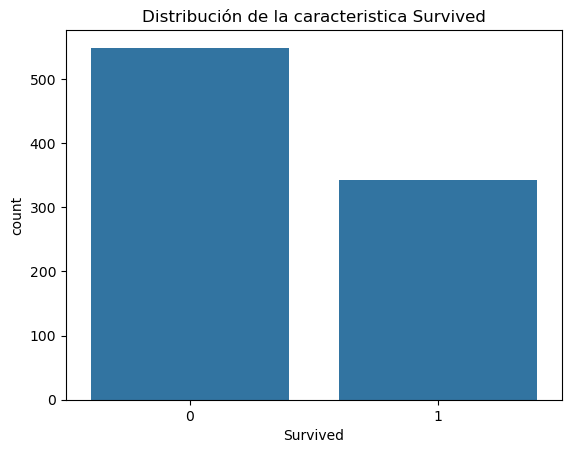

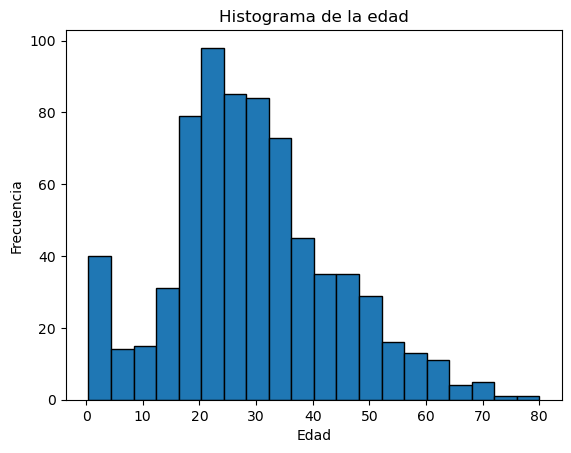

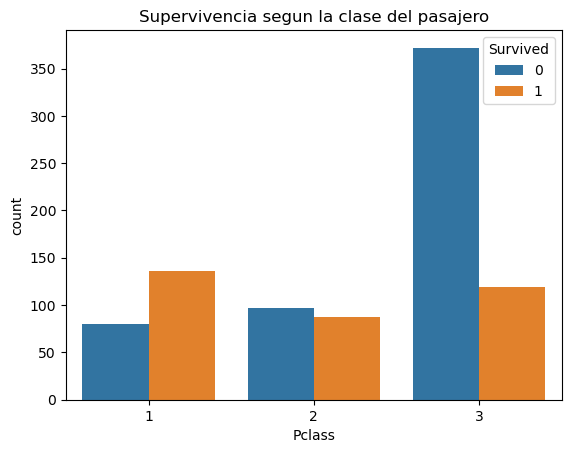

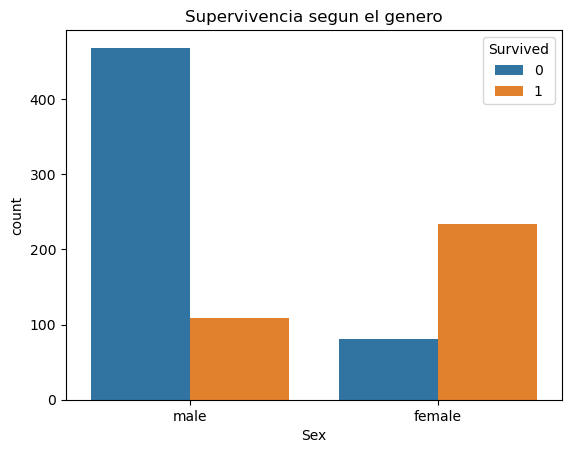

In [66]:
#Analisis de la distribución de las variables categóricas
print("\n Distribucion de la caracteristica supervivencia")
print(df['Survived'].value_counts())

sns.countplot(data=df, x='Survived')
plt.title("Distribución de la caracteristica Survived")
plt.show()

# Analisis de la edad
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 5. Relación entre Survived y Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Supervivencia segun la clase del pasajero")
plt.show()

# 6. Relación entre Survived y Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Supervivencia segun el genero")
plt.show()

In [91]:
#Se elimina la columna 'Cabin' porque la mayoria de sus datos son nulos (687)
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])
# En la columna 'Age' se rellenan los valores nulos utilizando la mediana
df['Age']= df['Age'].fillna(df['Age'].median())

# Para la columna 'Embarked' se rellenan los valores nulos utilizando la moda
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verificamos si existen valores nulos
print("\nValores nulos despues del tratamiento de datos:")
print(df.isnull().sum())



Valores nulos despues del tratamiento de datos:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [95]:
#Eliminacion de columnas irrelevantes
#Nombre
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])
#Ticket
if 'Ticket' in df.columns:
    df = df.drop(columns=['Ticket'])

#Codificación de Datos categoricos a numericos
#Codificamos la columna sex 
var_sex = LabelEncoder()
df['Sex'] = var_sex.fit_transform(df['Sex'])

#Codificamos la columna sexEmbarked
var_embarked = LabelEncoder()
df['Embarked'] = var_embarked.fit_transform(df['Embarked'])

print("\nInformacion del dataset despues de codificar las columnas categoricas")
print(df.head())


Informacion del dataset despues de codificar las columnas categoricas
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


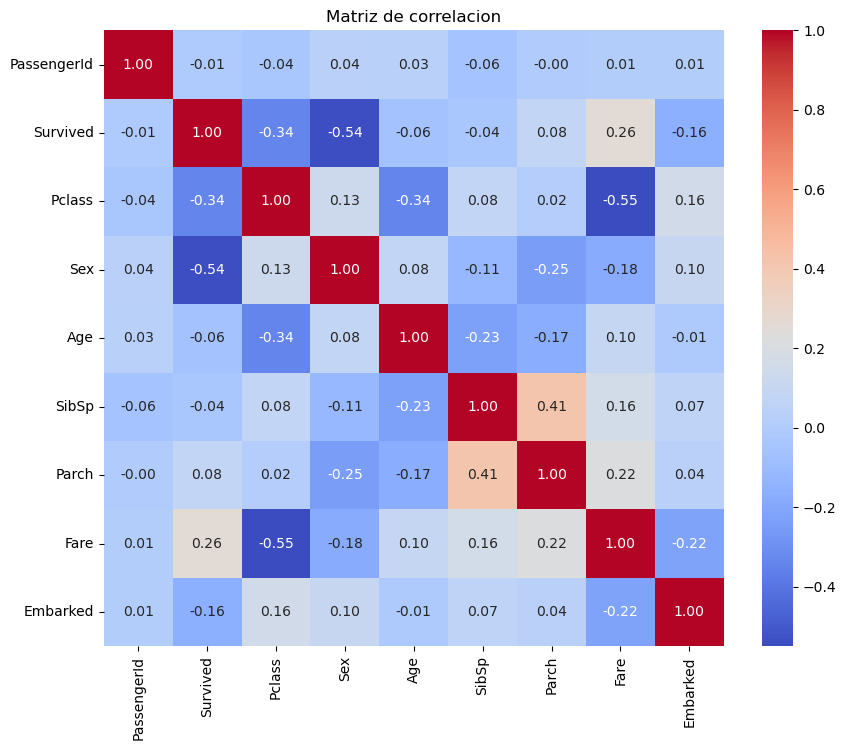

In [96]:
# Matriz de correlacion entre las columnas del datset
correlation_matrix = df.corr()

#Para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlacion")
plt.show()

In [97]:
#Separacion de las caracteristicas 
X = df.drop(columns=['Survived'])
y = df['Survived']

print("Variable x:")
print(X.head())

print("\nVariable y:")
print(y.head())

Variable x:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500         2
1            2       1    0  38.0      1      0  71.2833         0
2            3       3    0  26.0      0      0   7.9250         2
3            4       1    0  35.0      1      0  53.1000         2
4            5       3    1  35.0      0      0   8.0500         2

Variable y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [98]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifiacamos la division del dataset
print(f"Entrenamiento (X_train): {X_train.shape}")
print(f"Prueba (X_test): {X_test.shape}")

Entrenamiento (X_train): (712, 8)
Prueba (X_test): (179, 8)


In [99]:
# Creamos el modelo utilizando arboles de decision
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)

print("Modelo ha sido entrenado exitosamente")

Modelo ha sido entrenado exitosamente


In [100]:
y_pred = model.predict(X_test)

print("Metricas en el conjunto de prueba")
print(classification_report(y_test, y_pred))

Metricas en el conjunto de prueba
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



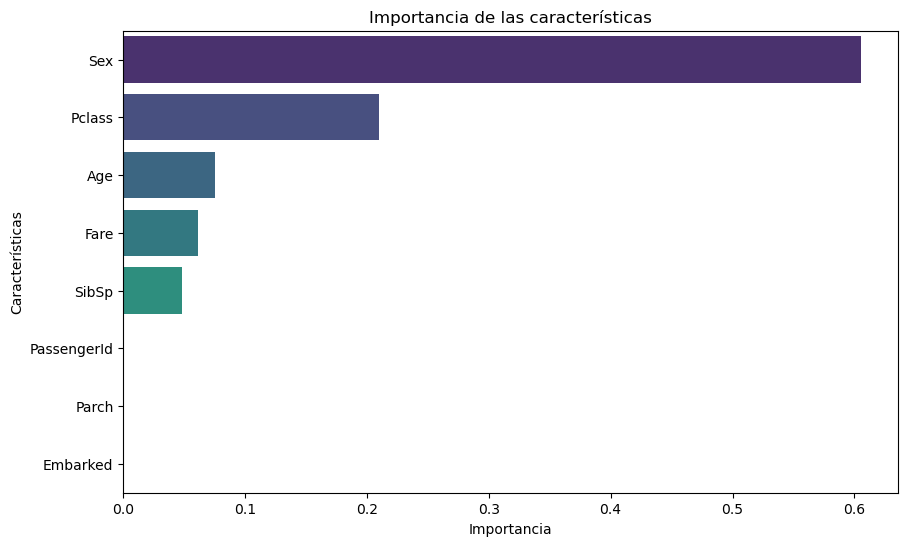

In [101]:
#Importancia de las caracteristicas en relacion de supervivencia
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


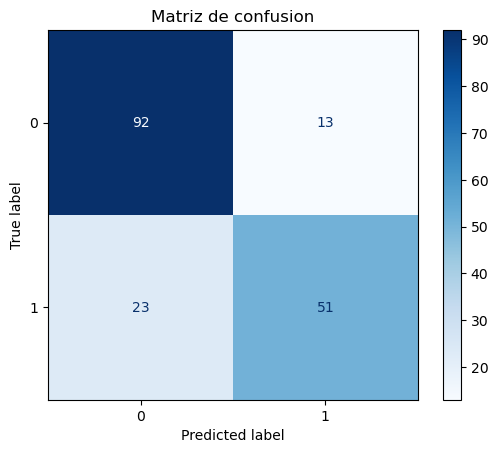

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de confusion")
plt.show()

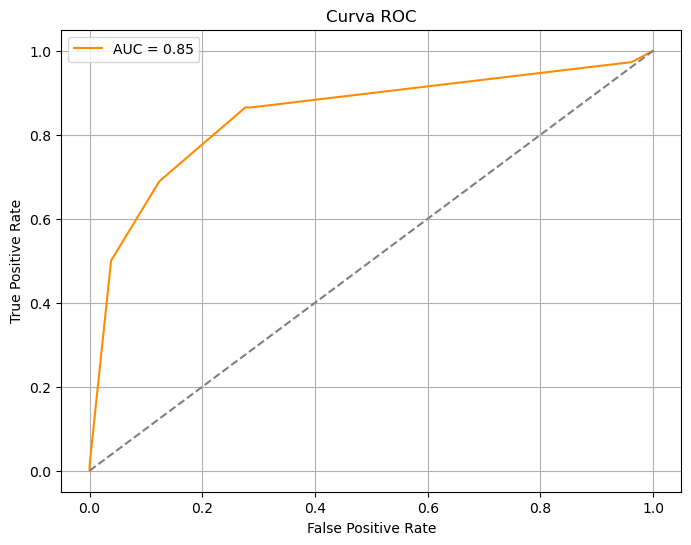

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades para el conjunto de prueba
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculamos curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Graficamo la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()